# From Prediction to Action: Integrated Decision-Making for Optimal Resource Allocation

## Introduction: Bridging the Gap Between Forecasting and Action

In many real-world scenarios, simply predicting the future is not enough. The true value lies in transforming those predictions into effective actions that optimize our outcomes. This notebook explores the critical connection between forecasting and decision-making, demonstrating how we can leverage advanced techniques to not only anticipate future events but also to proactively allocate resources in the most strategic way.

**The Challenge of Dynamic Resource Allocation:**

Imagine a scenario where you need to manage resources over time, such as inventory, personnel, or capital. You might have insights into future demand, market fluctuations, or other external factors. But knowing what *might* happen is only part of the puzzle. The real challenge is deciding *what to do* with that knowledge. When should you order more inventory? How much should you order? How do you balance immediate needs with the potential for future gains or losses?

**Our Approach: A Synergistic Blend of Bayesian Forecasting, Dynamic Programming, and Inventory Management:**

This notebook tackles these challenges by integrating three powerful analytical tools:

1.  **Bayesian Forecasting with PyMC:**
    *   We begin by using **Bayesian Structural Time Series (BSTS)** modeling with the **PyMC** library to generate robust forecasts. This probabilistic approach provides not just point estimates, but also a full distribution of possible future values, allowing us to capture uncertainty and make more informed decisions. The goal is to use the historical data to be able to forecast the demand in the future.
    * **Historical Data**: The model uses historical data to learn the pattern.
    * **Future demand**: The model then uses this knowledge to predict the future demand.
2.  **Wagner-Whitin Inventory Management:**
    *   We then introduce the **Wagner-Whitin inventory problem**, a classic example of dynamic resource allocation that's perfectly suited for the kind of multi-period planning we often face. The Wagner-Whitin algorithm, which is a dynamic programming technique, allows us to determine the optimal ordering policy over a finite planning horizon to minimize total costs, such as holding costs and fixed ordering costs.
    * **Optimal Policy**: The Wagner-Whitin algorithm will allow us to compute the optimal policy to order.
    * **Known Demand**: The algorithm requires to know the demand in the future.
3. **Integration:**
    * **Forecast as input**: The forecast from PyMC is used as the demand in the Wagner-Whitin problem.
    * The results from the forecast are used as an input to the Wagner-Whitin algorithm.
    * This way, we are able to use the predictions to take a decision.
    * The dynamic programming framework will allow to manage the inventory correctly.

**A Step-by-Step Roadmap:**

This notebook guides you through the following steps:

1.  **Setting the Stage:** We'll start by defining the problem of dynamic resource allocation and introducing the Wagner-Whitin inventory problem as our central case study. We'll clearly outline the key costs involved (ordering costs, holding costs) and the objective of minimizing total cost.
2.  **Bayesian Forecasting:** We'll dive into Bayesian Structural Time Series (BSTS) modeling using PyMC. You'll see how to:
    *   Prepare and visualize historical data.
    *   Build a Bayesian time series model with components like level and trend.
    *   Sample from the posterior distribution to get forecasts.
    *   Generate forecast intervals to quantify uncertainty.
3.  **Wagner-Whitin Dynamic Programming:** We'll implement the Wagner-Whitin algorithm using dynamic programming. You'll learn how to:
    *   Formulate the recursive relationships that define the problem.
    *   Compute the optimal cost function for each period.
    *   Reconstruct the optimal ordering policy.
    *   Visualize the policy in a clear Gantt chart style.
4. **Integration:** The result from the forecasting is used as an input to the Wagner-Whitin problem.
5.  **Connecting Forecasting and Action:** We'll then demonstrate how to link the Bayesian forecasts to the Wagner-Whitin model. You'll see how the forecast demand can be directly used as an input to the dynamic programming solution.
6. **Visualization**: The Gantt chart is used to visualize the solution.

**Who Should Read This Notebook?**

This notebook is designed for anyone interested in:

*   **Inventory Management:** Learn how to optimize ordering decisions under uncertainty.
*   **Bayesian Forecasting:** Discover how to build and use Bayesian time series models.
*   **Dynamic Programming:** Master the Wagner-Whitin algorithm and its application.
*   **Decision-Making:** Bridge the gap between prediction and action in a practical setting.
*   **Resource Allocation**: Learn how to manage resources efficiently.

**Let's embark on this journey to combine the power of forecasting and optimization to make smarter, more informed decisions about resource allocation!**
# Ocean Harvest Distribution

Our focus is to design an efficient and sustainable system to distribute the shells collected from our ocean harvest. The key components of this task include:

- **Mapping Demand:**
  Identify and analyze target markets and community needs to ensure that the distributed shells meet areas of highest impact.

- **Logistics Optimization:**
  Develop a transportation and scheduling plan that minimizes travel time and cost while maintaining shell quality during transit.

- **Resource Allocation:**
  Determine optimal methods for packaging, storage, and handling to preserve the integrity of the shells from collection to delivery.

- **Sustainability Considerations:**
  Ensure that every step—from harvesting to distribution—aligns with environmentally friendly practices and promotes long-term economic sustainability.

- **Scalability:**
  Create a flexible distribution framework that can adapt to variations in collection volumes and changing market demands.
# The Wagner-Whitin Inventory Problem

The **Wagner-Whitin inventory problem** is a classical inventory management problem that can be efficiently solved using dynamic programming. This problem considers a finite planning horizon with known, time-varying demands and involves deciding in which periods to place orders to minimize the total cost, which includes both fixed ordering costs and holding (inventory carrying) costs.

## Problem Overview

- **Objective:**
  Determine the optimal ordering policy over a finite horizon that minimizes the total cost incurred by ordering and holding inventory.

- **Key Components:**
  - **Demand:**
    Demand is known for each period in the planning horizon.
  - **Ordering Costs:**
    A fixed cost $K$ is incurred whenever an order is placed, regardless of the order size.
  - **Holding Costs:**
    A cost $h$ is incurred per unit of inventory carried from one period to the next.
  - **Assumptions:**
    The model assumes no shortages (or severe penalties if backlogging is allowed).

## Dynamic Programming Formulation

Dynamic programming solves this problem by breaking it into smaller subproblems. The key is to define a cost function $ F(t)$ representing the minimum total cost from period  $ t$ through the end of the planning horizon.

### Recurrence Relation

For a planning horizon of $ T$ periods, the recurrence relation can be written as:

$$
F(t) = \min_{k = t, \ldots, T} \left\{ K + \sum_{j=t}^{k-1} h \cdot I(j) + F(k+1) \right\}
$$

where:

- $K$ is the fixed ordering cost.
- $ h$ is the holding cost per unit per period.
- $ I(j)$ represents the inventory carried from period $ j$ to $ j+1$ when an order is placed in period $ t$ to cover demand up to period $ k$.
- $ F(T+1)$ is defined to be 0, as no cost is incurred beyond the planning horizon.

### How It Works

1. **Subproblem Definition:**
   Define $ F(t)$ as the minimum cost from period $ t$ to the end of the planning horizon.

2. **Decision Process:**
   For each period $ t$, evaluate the cost of placing an order to cover demands from period $ t$ up to any later period $ k$. This cost includes:
   - The fixed ordering cost $ K$.
   - The holding costs for carrying inventory to later periods $ \sum_{j=t}^{k-1} h \cdot I(j)$.
   - The future cost $ F(k+1)$.

3. **Optimal Substructure:**
   The optimal solution to the overall problem is built from the optimal solutions to these subproblems.

4. **Overlapping Subproblems:**
   Decisions in one period affect subsequent periods, which means that subproblems overlap and can be solved efficiently using memoization or a bottom-up approach.

## Why Use Dynamic Programming?

- **Optimal Substructure:**
  The overall optimal solution can be constructed from optimal solutions of its subproblems.

- **Overlapping Subproblems:**
  By breaking down the problem, many subproblems are solved repeatedly. Dynamic programming efficiently reuses these solutions to avoid redundant calculations.

- **Efficiency:**
  This method systematically evaluates all possible ordering decisions, ensuring that the minimal total cost is achieved.

## Summary

The Wagner-Whitin inventory problem is a cornerstone example in inventory management and dynamic programming. It illustrates how to decompose a complex, multi-period decision problem into manageable subproblems, where the decisions on when to order and how much inventory to hold are optimized to minimize total costs. This approach is particularly useful when demands are known in advance and fixed ordering costs are significant.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pymc as pm
import arviz as az

In [2]:
def wagner_whitin(demands, K, h):
    """
    Solves the Wagner-Whitin inventory problem using dynamic programming.

    Parameters:
      demands (list of float): Demand for each period (indexed 0 to T-1).
      K (float): Fixed ordering cost per order.
      h (float): Holding cost per unit per period.

    Returns:
      f (list of float): Minimal total cost from period t to end (for t=0,...,T).
      order_plan (list of int): For each period t, the last period covered by the order placed at t.
                                If order_plan[t] = j, then an order is placed in period t to cover periods t to j.
                                For periods without orders, the value is None.
    """
    T = len(demands)
    f = [0] * (T + 1)
    order_plan = [None] * T

    # Iterate backwards from period T-1 to 0.
    for t in range(T - 1, -1, -1):
        min_cost = float('inf')
        best_j = None
        inventory_cost = 0  # Accumulated holding cost if ordering to cover up to period j.
        cumulative_demand = 0  # Sum of demands from period t+1 to j.

        # Consider ordering in period t to cover demand from period t to j.
        for j in range(t, T):
            if j > t:
                cumulative_demand += demands[j - 1]
                inventory_cost += h * cumulative_demand

            cost = K + inventory_cost + (f[j + 1] if j + 1 <= T else 0)

            if cost < min_cost:
                min_cost = cost
                best_j = j

        f[t] = min_cost
        order_plan[t] = best_j

    return f, order_plan


def reconstruct_policy(order_plan, T):
    """
    Reconstructs the ordering policy from the computed order_plan.

    Parameters:
      order_plan (list of int): The computed order plan where order_plan[t] = j means
                                an order in period t covers periods t to j.
      T (int): Total number of periods.

    Returns:
      policy (list of tuple): Each tuple is (order_period, cover_from, cover_to).
    """
    policy = []
    t = 0
    while t < T:
        j = order_plan[t]
        policy.append((t, t, j))
        t = j + 1
    return policy


def plot_policy(policy, T):
    """
    Visualizes the ordering policy as a Gantt-chart style plot.

    Parameters:
      policy (list of tuple): List of orders as (order_period, cover_from, cover_to).
      T (int): Total number of periods.
    """
    fig, ax = plt.subplots(figsize=(10, 2 + len(policy)))

    for idx, (order_period, _, cover_to) in enumerate(policy):
        width = cover_to - order_period + 1  # number of periods covered
        ax.broken_barh([(order_period, width)], (idx - 0.4, 0.8), facecolors='tab:blue')
        ax.text(order_period + width / 2, idx, f"Order at {order_period}",
                va='center', ha='center', color='white', fontsize=10)

    ax.set_xlabel("Period")
    ax.set_ylabel("Order Number")
    ax.set_title("Wagner-Whitin Inventory Order Policy")
    ax.set_xlim(0, T)
    ax.set_ylim(-0.5, len(policy) - 0.5)
    ax.set_yticks(range(len(policy)))
    ax.set_yticklabels([f"Order {p[0]}" for p in policy])
    ax.set_xticks(range(T + 1))
    plt.tight_layout()
    plt.show()


Minimum total cost: 1080
Order plan (each tuple: (order_period, covers from, covers to)):
Order in period 0 covers periods 0 to 2
Order in period 3 covers periods 3 to 5


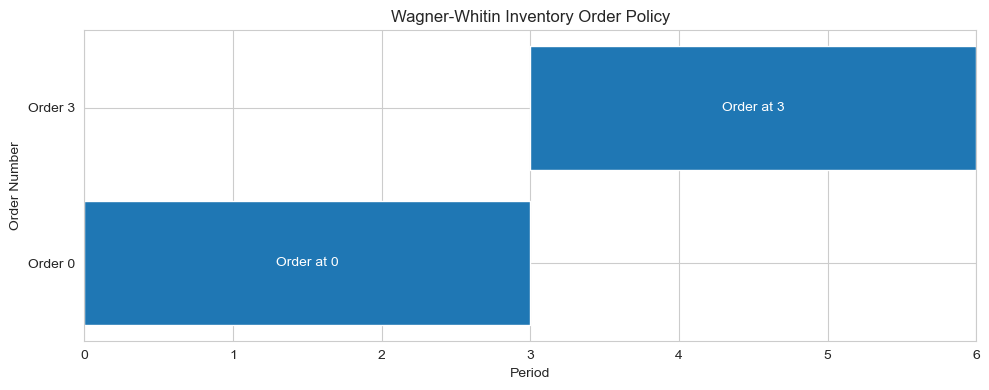

In [3]:
# Define a sample problem:
demands = [20, 30, 40, 10, 50, 100]
K = 400  # Fixed ordering cost
h = 2   # Holding cost per unit per period

# Compute the minimum cost and order plan.
f, order_plan = wagner_whitin(demands, K, h)
policy = reconstruct_policy(order_plan, len(demands))

print("Minimum total cost:", f[0])
print("Order plan (each tuple: (order_period, covers from, covers to)):")
for order in policy:
    print(f"Order in period {order[0]} covers periods {order[1]} to {order[2]}")

# Visualize the ordering policy.
plot_policy(policy, len(demands))

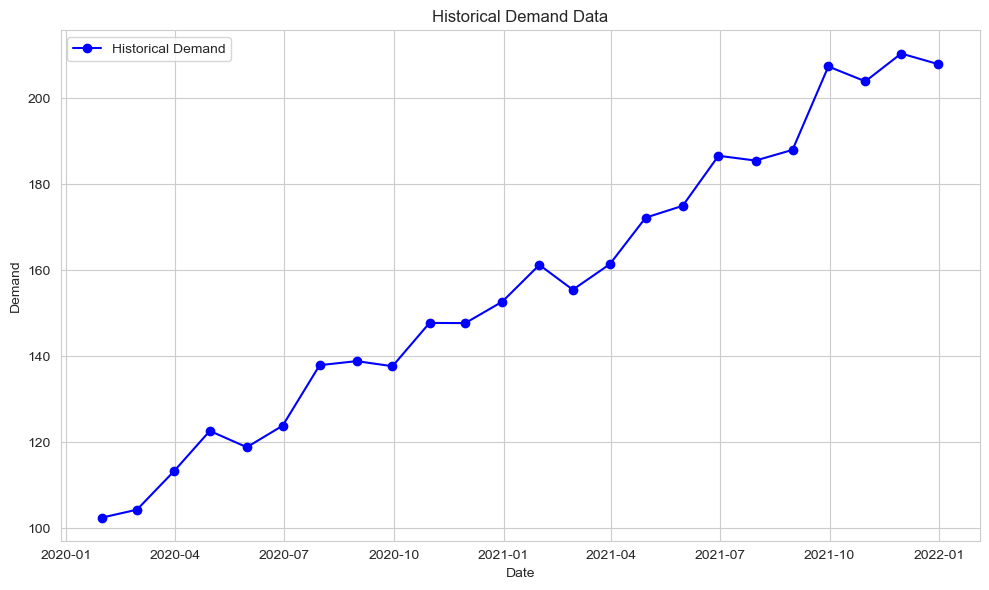

In [13]:
# --- Data Preparation ---
np.random.seed(42)
n = 24            # Number of historical time points
n_forecast = 6    # Number of forecast periods
n_total = n + n_forecast  # Total time points (historical + forecast)
time = np.arange(n_total)

# Generate synthetic historical demand data with a linear trend and noise
dates = pd.date_range(start='2020-01-01', periods=n, freq='ME')
true_level = 100
true_trend = 5
y = true_level + true_trend * np.arange(n) + np.random.normal(0, 5, size=n)

# --- Plotting Historical Demand ---
plt.figure(figsize=(10, 6))
plt.plot(dates, y, marker='o', linestyle='-', color='blue', label='Historical Demand')
plt.title("Historical Demand Data")
plt.xlabel("Date")
plt.ylabel("Demand")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [14]:
# --- Model Building with PyMC ---
with pm.Model() as model:
    # Priors for observation and state noise standard deviations
    sigma_obs = pm.HalfNormal("sigma_obs", sigma=10)
    sigma_level = pm.HalfNormal("sigma_level", sigma=10)
    sigma_trend = pm.HalfNormal("sigma_trend", sigma=10)

    # Define latent states over the full time horizon (historical + forecast)
    level = pm.GaussianRandomWalk("level", sigma=sigma_level, shape=n_total)
    trend = pm.GaussianRandomWalk("trend", sigma=sigma_trend, shape=n_total)

    # Expected value (mu) at each time step: level + trend * time_index
    mu = level + trend * time

    # Only the first n time points (historical data) are observed
    y_obs = pm.Normal("y_obs", mu=mu[:n], sigma=sigma_obs, observed=y)

    # Sample from the posterior
    trace = pm.sample(1000, tune=1000, target_accept=0.95, return_inferencedata=True)

/opt/anaconda3/envs/2025_02_python_3_12/lib/python3.12/site-packages/pymc/distributions/timeseries.py:297: UserWarning: Initial distribution not specified, defaulting to `Normal.dist(0, 100)`.You can specify an init_dist manually to suppress this warning.
  warnings.warn(
/opt/anaconda3/envs/2025_02_python_3_12/lib/python3.12/site-packages/pymc/distributions/timeseries.py:297: UserWarning: Initial distribution not specified, defaulting to `Normal.dist(0, 100)`.You can specify an init_dist manually to suppress this warning.
  warnings.warn(
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma_obs, sigma_level, sigma_trend, level, trend]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 25 seconds.
There were 10 divergences after tuning. Increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


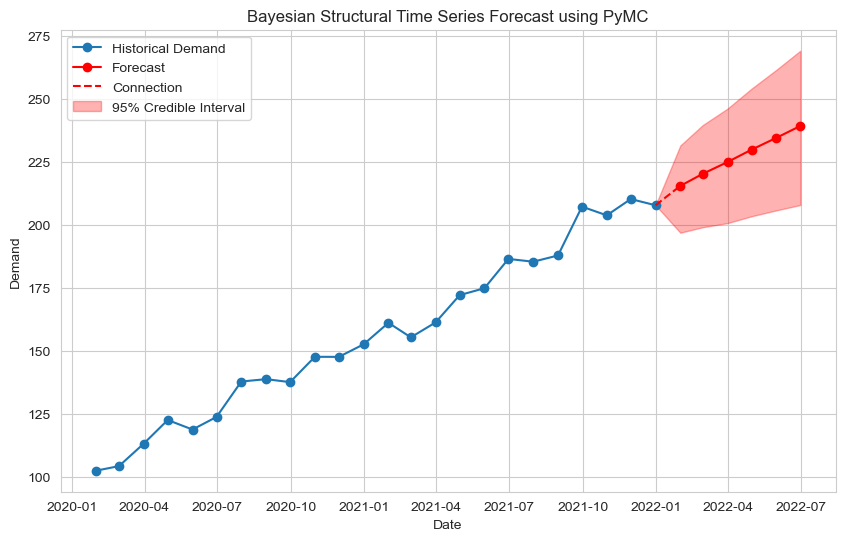

Minimum total cost: 3000
Order plan (each tuple: (order_period, covers from, covers to)):
Order in period 0 covers periods 0 to 0
Order in period 1 covers periods 1 to 1
Order in period 2 covers periods 2 to 2
Order in period 3 covers periods 3 to 3
Order in period 4 covers periods 4 to 4
Order in period 5 covers periods 5 to 5


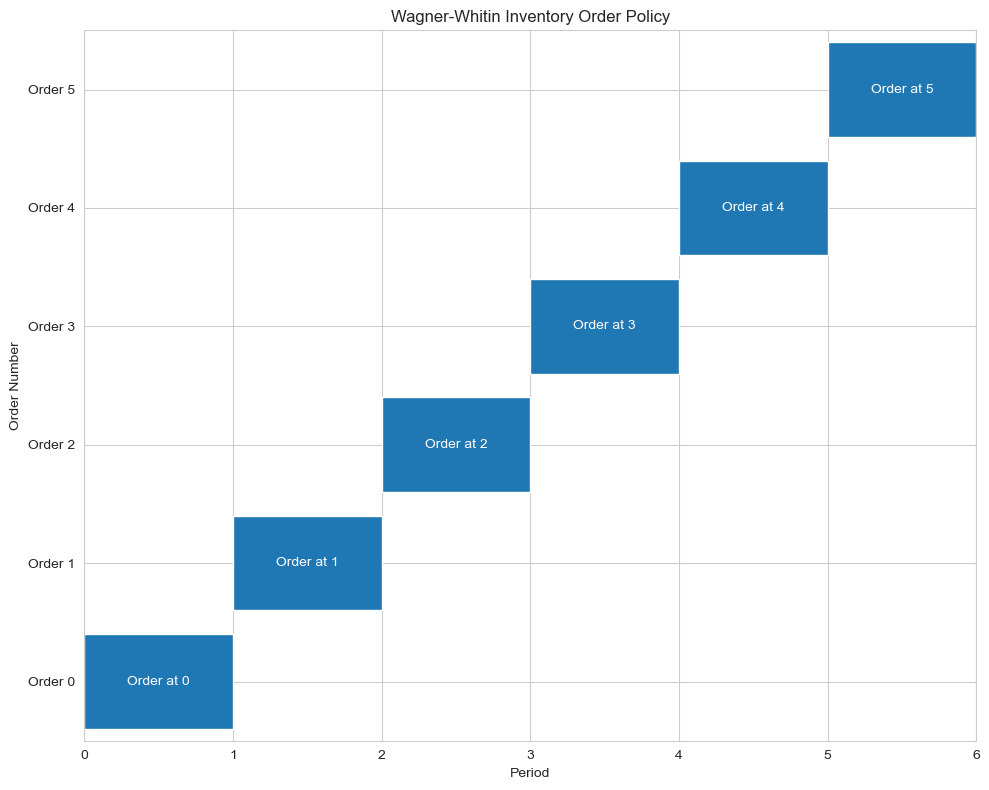

In [15]:
# --- Posterior Predictive Forecasting ---
# Compute mu samples for the full time horizon (historical + forecast)
time_extended = np.arange(n_total)
mu_samples = trace.posterior["level"] + trace.posterior["trend"] * time_extended.reshape(1, 1, -1)

# Extract and flatten forecast samples (indices n to n_total-1)
forecast_samples = mu_samples[..., n:].values.reshape(-1, n_forecast)

# Compute forecast summary statistics
forecast_median = np.median(forecast_samples, axis=0)
forecast_lower = np.percentile(forecast_samples, 5, axis=0)
forecast_upper = np.percentile(forecast_samples, 95, axis=0)

# Create forecast dates
forecast_dates = pd.date_range(start=dates[-1] + pd.DateOffset(months=1), periods=n_forecast, freq='ME')

# --- Extended Arrays for Smooth Connection ---
# Ensure consistent date types by converting to numpy.datetime64
extended_dates = np.hstack((dates[-1].to_datetime64(), forecast_dates.to_numpy()))
extended_median = np.concatenate(([y[-1]], forecast_median))
extended_lower = np.concatenate(([y[-1]], forecast_lower))
extended_upper = np.concatenate(([y[-1]], forecast_upper))

# --- Plotting ---
plt.figure(figsize=(10, 6))
plt.plot(dates, y, "o-", label="Historical Demand")
plt.plot(forecast_dates, forecast_median, "o-", color="red", label="Forecast")
plt.plot([dates[-1], forecast_dates[0]], [y[-1], forecast_median[0]], "r--", label="Connection")
plt.fill_between(extended_dates, extended_lower, extended_upper, color="red", alpha=0.3, label="95% Credible Interval")
plt.title("Bayesian Structural Time Series Forecast using PyMC")
plt.xlabel("Date")
plt.ylabel("Demand")
plt.legend()
plt.grid(True)
plt.show()
# Define a sample problem:
demands = forecast_median
K = 500  # Fixed ordering cost
h = 3    # Holding cost per unit per period

# Compute the minimum cost and order plan.
f, order_plan = wagner_whitin(demands, K, h)
policy = reconstruct_policy(order_plan, len(demands))

print("Minimum total cost:", f[0])
print("Order plan (each tuple: (order_period, covers from, covers to)):")
for order in policy:
    print(f"Order in period {order[0]} covers periods {order[1]} to {order[2]}")

# Visualize the ordering policy.
plot_policy(policy, len(demands))

Minimum total cost: 3000
Order plan (each tuple: (order_period, covers from, covers to)):
Order in period 0 covers periods 0 to 0
Order in period 1 covers periods 1 to 1
Order in period 2 covers periods 2 to 2
Order in period 3 covers periods 3 to 3
Order in period 4 covers periods 4 to 4
Order in period 5 covers periods 5 to 5


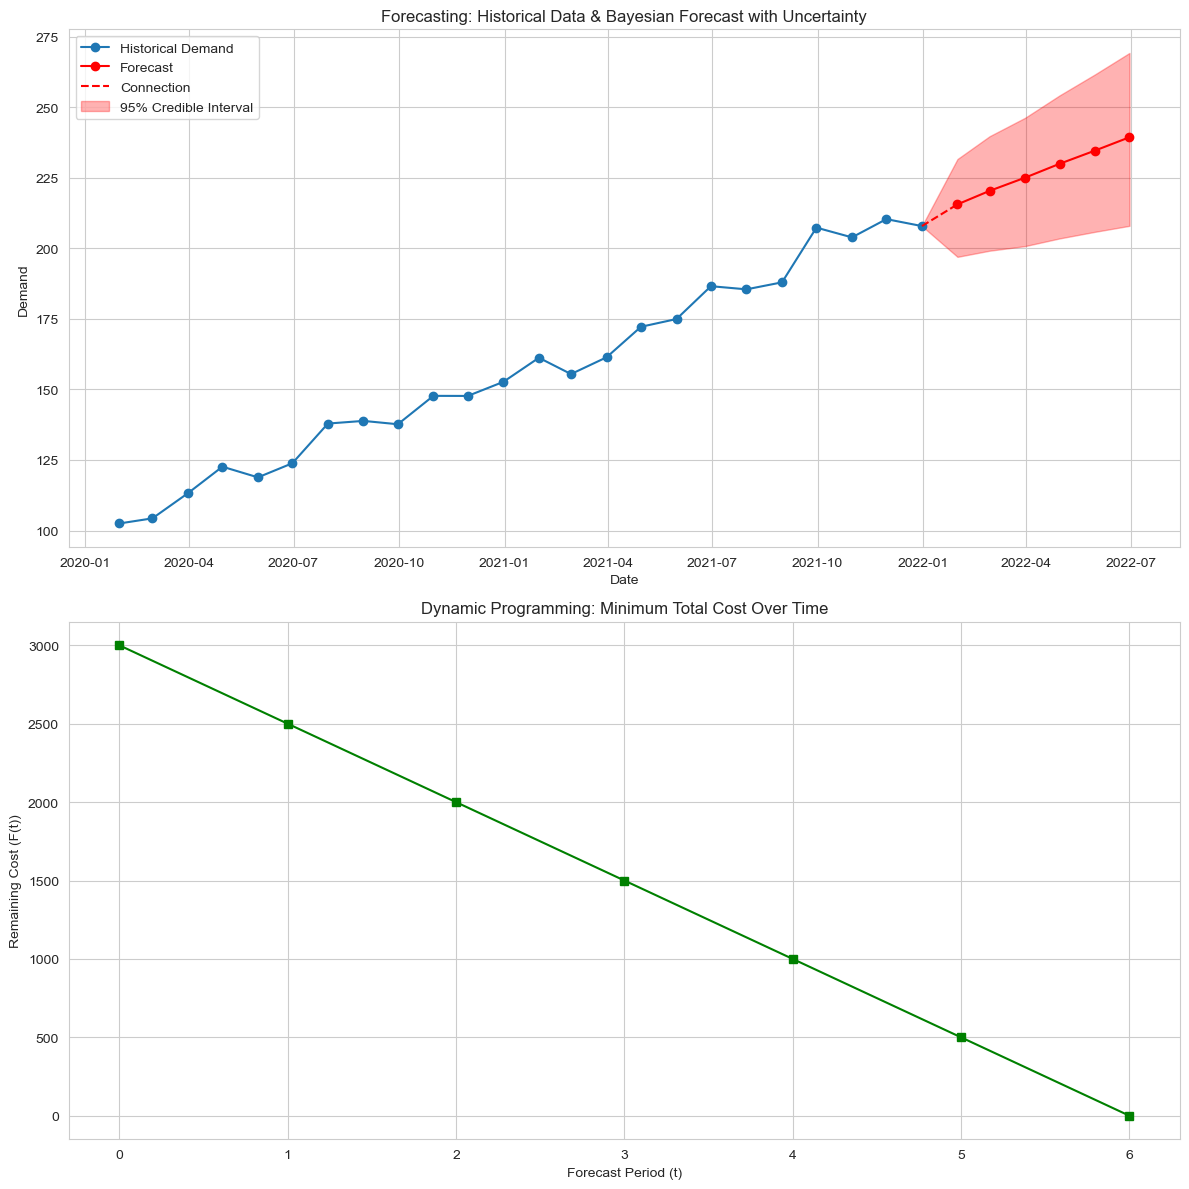

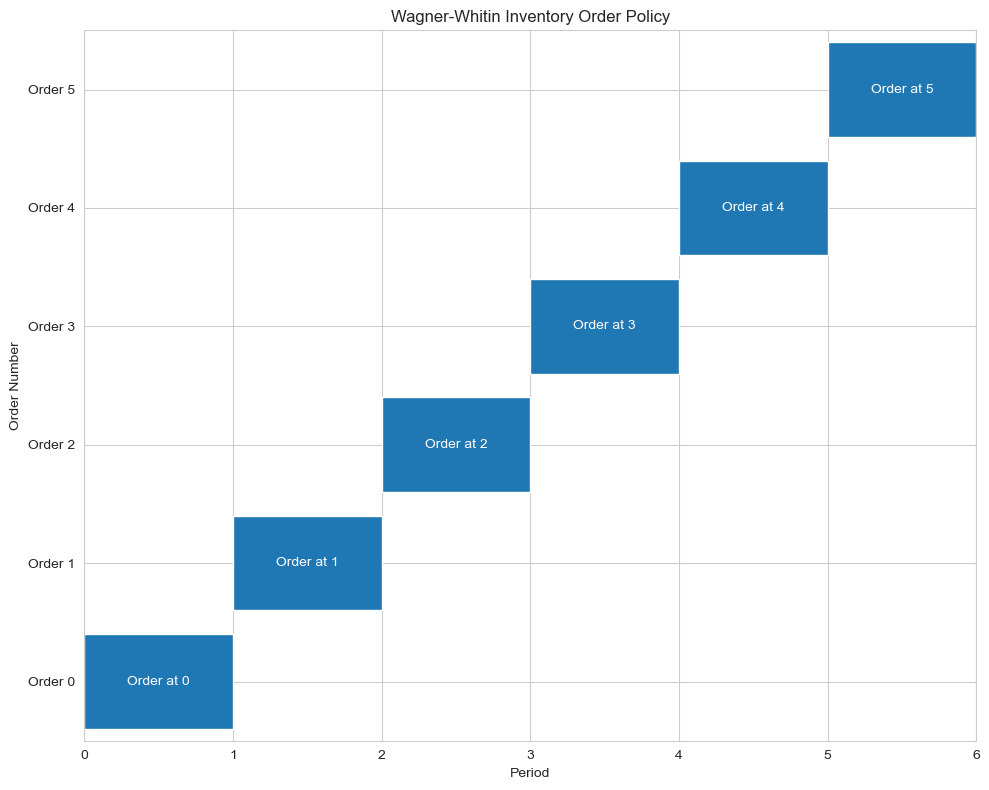

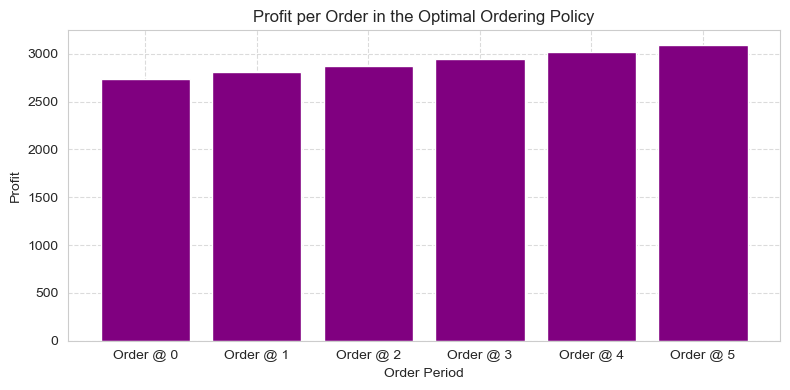

In [16]:
# Use forecast_median as the demand for the Wagner-Whitin model
demands = forecast_median
K = 500  # Fixed ordering cost
h = 10  # Holding cost per unit per period
f, order_plan = wagner_whitin(demands, K, h)
policy = reconstruct_policy(order_plan, len(demands))
print("Minimum total cost:", f[0])
print("Order plan (each tuple: (order_period, covers from, covers to)):")
for order in policy:
    print(f"Order in period {order[0]} covers periods {order[1]} to {order[2]}")

fig, axs = plt.subplots(2, 1, figsize=(12, 12))

# Top subplot: Forecast with Historical Data and Credible Interval
axs[0].plot(dates, y, "o-", label="Historical Demand")
axs[0].plot(forecast_dates, forecast_median, "o-", color="red", label="Forecast")
axs[0].plot([dates[-1], forecast_dates[0]], [y[-1], forecast_median[0]], "r--", label="Connection")
axs[0].fill_between(extended_dates, extended_lower, extended_upper, color="red", alpha=0.3,
                    label="95% Credible Interval")
axs[0].set_title("Forecasting: Historical Data & Bayesian Forecast with Uncertainty")
axs[0].set_xlabel("Date")
axs[0].set_ylabel("Demand")
axs[0].grid(True)
axs[0].legend()

# Bottom subplot: Cost Function over Time from Wagner-Whitin DP
# f is an array of minimum total cost from period t to end. Plot it versus period.
periods = np.arange(len(f))
axs[1].plot(periods, f, marker="s", linestyle="-", color="green")
axs[1].set_title("Dynamic Programming: Minimum Total Cost Over Time")
axs[1].set_xlabel("Forecast Period (t)")
axs[1].set_ylabel("Remaining Cost (F(t))")
axs[1].grid(True)

plt.tight_layout()
plt.show()

plot_policy(policy, len(demands))

# For simplicity, assume a constant selling price per unit.
selling_price = 15
order_profits = []
order_labels = []
for order in policy:
    start, _, end = order
    # Revenue: sum of forecast demand covered * selling price.
    revenue = np.sum(demands[start:end + 1]) * selling_price
    # Compute holding cost incurred for this order.
    holding_cost_total = 0
    cumulative = 0
    for j in range(start + 1, end + 1):
        cumulative += demands[j - 1]
        holding_cost_total += h * cumulative
    cost_order = K + holding_cost_total
    profit_order = revenue - cost_order
    order_profits.append(profit_order)
    order_labels.append(f"Order @ {start}")

# Plot Profit per Order as a Bar Chart
plt.figure(figsize=(8, 4))
plt.bar(order_labels, order_profits, color="purple")
plt.xlabel("Order Period")
plt.ylabel("Profit")
plt.title("Profit per Order in the Optimal Ordering Policy")
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()